<a href="https://colab.research.google.com/github/m02chowdhury/tasks/blob/main/Part_B_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Performance of Logistic Regression:
✔️ Accuracy: 0.9263
✔️ Precision: 0.9263
✔️ Recall: 0.9263
✔️ F1-score: 0.9261
----------------------------------------
📊 Performance of Decision Tree:
✔️ Accuracy: 0.9597
✔️ Precision: 0.9597
✔️ Recall: 0.9597
✔️ F1-score: 0.9597
----------------------------------------


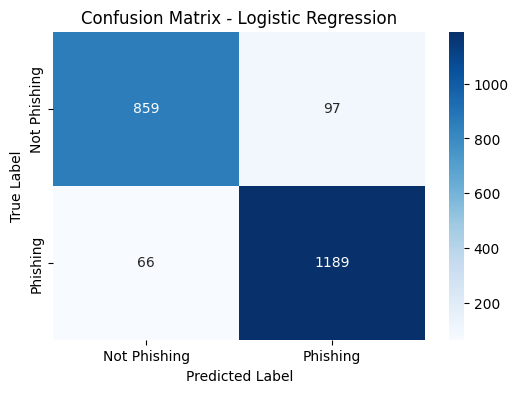

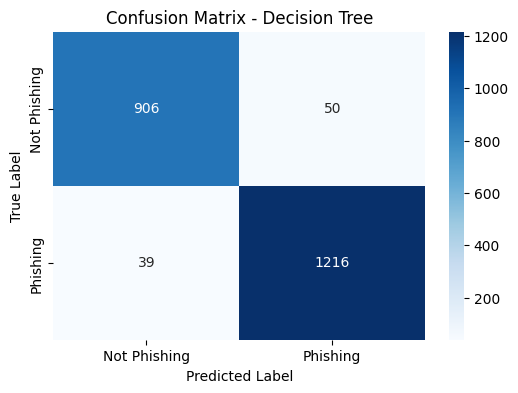

In [ ]:
# Import necessary libraries
import pandas as pd
from scipy.io import arff
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Load dataset
data, meta = arff.loadarff("Training Dataset.arff")
df = pd.DataFrame(data)

# Convert byte strings to strings
for col in df.select_dtypes([object]):
 df[col] = df[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Define features and target
X = df.drop(columns=['Result'])  # Features
y = df['Result'].astype(int)  # Target variable

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)



# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"📊 Performance of {model_name}:")
    print(f"✔️ Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"✔️ Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"✔️ Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"✔️ F1-score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("-" * 40)

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)
evaluate_model("Decision Tree", y_test, y_pred_decision_tree)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Phishing", "Phishing"], yticklabels=["Not Phishing", "Phishing"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Confusion Matrices
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_decision_tree, "Decision Tree")